In [409]:
%matplotlib inline
import numpy as np
import scipy as sp
import sympy as smp
from sympy import lambdify
from scipy.integrate import quad
import random
import math
import matplotlib.pyplot as plt
import scienceplots

Monte Carlo Simulation, also known as the Monte Carlo Method or a multiple probability simulation, is a mathematical technique, which is used to estimate the possible outcomes of an uncertain event. The Monte Carlo Method was invented by John von Neumann and Stanislaw Ulam during World War II to improve decision making under uncertain conditions. It was named after a well-known casino town, called Monaco, since the element of chance is core to the modeling approach, similar to a game of roulette.

Regardless of what tool you use, Monte Carlo techniques involves three basic steps:

1. Set up the predictive model, identifying both the dependent variable to be predicted and the independent variables (also known as the input variables) that will drive the prediction.

2. Specify probability distributions of the independent variables. Use input data to define a range of likely values and assign probability weights for each.

3. Run simulations repeatedly, generating random values of the independent variables.

Examples: Random Walk, Estimate pi value, Monte carlo integration

# Test of Randomness:


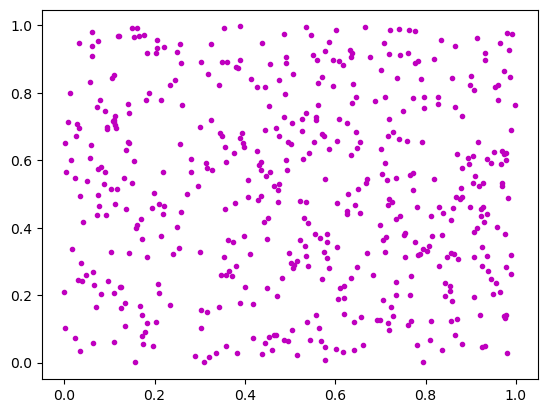

In [410]:
n=1000
quantity=np.random.random(n) #generates 1000 random number between 0 and 1

#visualisation

plt.plot(quantity[::2],quantity[1::2],"m.")

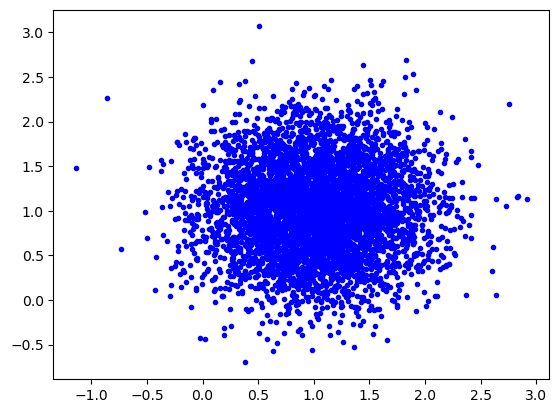

In [411]:
#geneating data points using normal distribution having mean 1 and standard deviation 0.5

data=np.random.normal(1,0.5, size=10000) 
plt.plot(data[::2],data[1::2],"b.")

Normal distribution peaks at mean value , mostly data points populates around means making the plot denser in the i the central region.  

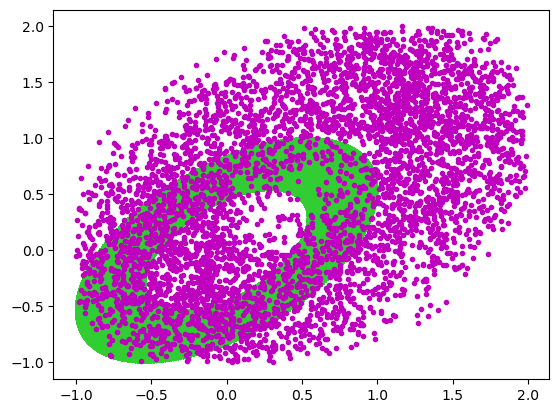

In [412]:
x_1=np.array([np.sin(i) for i in range(10000)])
plt.plot(x_1[::2],x_1[1::2], color="limegreen")

x_2=np.array([np.sin(i)+np.random.random() for i in range(10000)]) #adding randomness
plt.plot(x_2[::2],x_2[1::2],"m.")

# Random Walk Problem:


In [413]:
def random_walk(n): 
    '''return coordinstes after n block random walk'''
    
    x,y=0.0,0.0
    
    ''' intial position of grid/block'''
    for i in range(n): #number of steps to walk
        step=random.choice(['N','S','E','W'])
        if step=='N':
            y=y+1
        elif step=='S':
            y=y-1
        elif step=='E':
            x=x+1
        else:
            x=x-1
    return (x,y)

for i in range(20):
    '''to test this function lets say 20 random walks of each size 10 blocks from centre'''
    walk=random_walk(10) 
    '''walk '''
    print(walk, "distance from centre:", abs(walk[0]+walk[1]))        

(2.0, -2.0) distance from centre: 0.0
(3.0, 5.0) distance from centre: 8.0
(-1.0, -1.0) distance from centre: 2.0
(-2.0, 2.0) distance from centre: 0.0
(0.0, 0.0) distance from centre: 0.0
(-1.0, -1.0) distance from centre: 2.0
(1.0, 3.0) distance from centre: 4.0
(-1.0, 3.0) distance from centre: 2.0
(1.0, 3.0) distance from centre: 4.0
(-3.0, 1.0) distance from centre: 2.0
(-5.0, 3.0) distance from centre: 2.0
(0.0, 2.0) distance from centre: 2.0
(4.0, 2.0) distance from centre: 6.0
(-4.0, 0.0) distance from centre: 4.0
(-1.0, -1.0) distance from centre: 2.0
(-1.0, 1.0) distance from centre: 0.0
(-2.0, 2.0) distance from centre: 0.0
(-2.0, -2.0) distance from centre: 4.0
(-1.0, 1.0) distance from centre: 0.0
(4.0, 2.0) distance from centre: 6.0


In [414]:
#Compact version of random walk problem

def random_walk(n): 
    '''return coordinstes after n block random walk'''
    
    x,y=0.0,0.0 #centre or starting point
    
    ''' intial position of grid/block:  starting point of the random walk'''
    
    for i in range(n): #number of steps to walk
        (dx,dy)=random.choice([(0,1),(0,-1),(1,0),(-1,0)])
        
        '''if north is chosen in crease y by 1, if south is chosen decresae x by -1,
        if east is chosen increase x by 1 and finally if west is chosen decrease by -1'''
        
        x+=dx #x=x+dx
        y+=dy #y=y+dy
    return (x,y)

for i in range(20):
    '''to test this function lets say 20 random walks of each size 10 blocks from centre'''
    walk=random_walk(10) 
    '''walk '''
    print(walk, "distance from centre:", abs(walk[0])+abs(walk[1]))        


(-1.0, -1.0) distance from centre: 2.0
(1.0, 3.0) distance from centre: 4.0
(0.0, 0.0) distance from centre: 0.0
(2.0, 0.0) distance from centre: 2.0
(-1.0, 1.0) distance from centre: 2.0
(-3.0, -1.0) distance from centre: 4.0
(2.0, 2.0) distance from centre: 4.0
(3.0, -1.0) distance from centre: 4.0
(-3.0, -1.0) distance from centre: 4.0
(-1.0, 1.0) distance from centre: 2.0
(-4.0, 0.0) distance from centre: 4.0
(1.0, -3.0) distance from centre: 4.0
(2.0, -2.0) distance from centre: 4.0
(1.0, 1.0) distance from centre: 2.0
(-1.0, -3.0) distance from centre: 4.0
(1.0, 3.0) distance from centre: 4.0
(-1.0, 1.0) distance from centre: 2.0
(-4.0, 0.0) distance from centre: 4.0
(3.0, 3.0) distance from centre: 6.0
(-1.0, -3.0) distance from centre: 4.0


What is the longest random walk you can take that on average you will end up 5 blocks or fewer from centre? Lets answer with Monte Carlo Method

In [415]:
number_of_walk=10000

for walk_length in range(1,21):# let's estimate the probability walk centre for 10000 walk 
    no_transport=0 #if you walk 5 blocks or fewer from centre
    for i in range(number_of_walk):
        '''to test this function lets say 10000 random walks of each size 20 blocks from centre'''
        x,y=random_walk(walk_length) #monte carlo loop
        distance=abs(x)+abs(y)
        if distance <=5:
            no_transport+=1
    no_transport_fraction=no_transport/number_of_walk #requires no transport
    print("walk size= ", walk_length, "that requires no transport is :", 100*no_transport_fraction)        

    
    

walk size=  1 that requires no transport is : 100.0
walk size=  2 that requires no transport is : 100.0
walk size=  3 that requires no transport is : 100.0
walk size=  4 that requires no transport is : 100.0
walk size=  5 that requires no transport is : 100.0
walk size=  6 that requires no transport is : 93.56
walk size=  7 that requires no transport is : 97.02
walk size=  8 that requires no transport is : 85.94000000000001
walk size=  9 that requires no transport is : 92.02
walk size=  10 that requires no transport is : 78.45
walk size=  11 that requires no transport is : 87.71
walk size=  12 that requires no transport is : 72.95
walk size=  13 that requires no transport is : 82.39
walk size=  14 that requires no transport is : 67.83
walk size=  15 that requires no transport is : 77.25999999999999
walk size=  16 that requires no transport is : 62.19
walk size=  17 that requires no transport is : 73.00999999999999
walk size=  18 that requires no transport is : 58.5
walk size=  19 that 

# Monte Carlo Integration :



\begin{equation}
 y=\int_{1}^{10}\,\frac{lnx}{x}\,dx
\end{equation}

In [416]:
#integration using sympy: analytical solution

x=smp.symbols('x')
func=smp.log(x)/x
res=smp.integrate(func,(x,1,10))
print("Integrated values =", res)

Integrated values = log(10)**2/2


In [417]:
np.log(10)**2/2

In [418]:
#integration using scipy: numerical solution

integrand= lambda x: np.log(x)/x

integral=quad(integrand,1,10)
print("Integrated values=", integral)


Integrated values= (2.6509490552391988, 4.524478042180952e-12)


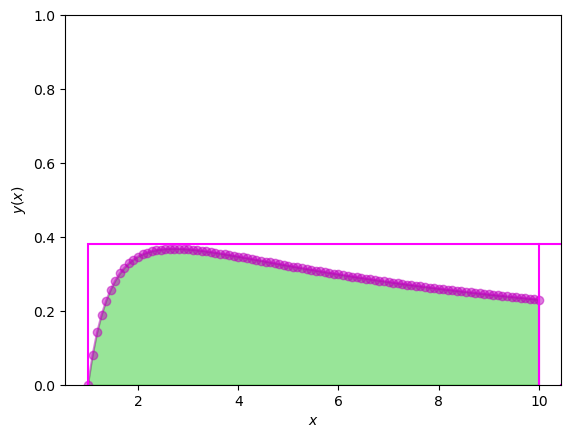

In [419]:
#plotting the function for visualisation

x=np.linspace(1,10,100)

def y(x):
    return np.log(x)/x

plt.plot(x, y(x),"m", marker="o", alpha=0.5)
plt.axhline(y=0, xmin=1, xmax=10, color="magenta")
plt.axhline(y=0.38, xmin=0.05, xmax=10, color="magenta")
plt.axvline(x=10, ymin=0, ymax=0.25,color="magenta")
plt.axvline(x=1, ymin=0, ymax=0.38,color="magenta")
plt.axvline(x=10, ymin=0, ymax=0.38,color="magenta")

plt.fill_between(x,y(x),color='limegreen', alpha=0.5)
plt.xlabel(r"$x$")
plt.ylabel(r'$y(x)$')
plt.ylim(0,1)
plt.show()


The integration is nothing but the area under the curve. We have obatained the analytical solution by simply integrate y however we are looking for the numerical solution using Monte Carlo Method. For that we can generate random points between the domain {1,10} where the function is defined and check  whether all these points fall inside the curve to get the required solution. In order to get good approximation we can generates large number of points.

Probability that points lies inside the curve = area under the curve / area of box

$\Longrightarrow$ points lies inside the curve/total generated points = area under the curve / area of box

$\Longrightarrow$ area under the curve=(points lies inside the curve / total generated points) $*$ area of box

In [420]:
#We want to calculate the area under the curve using Monte Carlo Method

def function(x):
    y=np.log(x)/x
    return y

count=0.0 #how many points generated, intially zero
in_area=0.0 #points that falls inside the curve initially is zero

while count < 100000: 
    ''' this generates x and y coordinates'''
    x=random.uniform(1,10) #domain of x
    y=random.uniform(0,1/np.e) #range of y
    
    if y < function(x):
        in_area+=1
        '''this ensures counts lies inside the curve'''
    count+=1 #repeating the process until 100000 points
    
height=1/np.e
width=9 # upperb bound-lower bound of x
area_of_box=height*width
result=(in_area/count)*area_of_box
print("Integrated values",result )

Integrated values 2.6417790549962445


We see Monte Carlo Method gives approximate result that is close to analytical solution obatained using sympy. Another example let's calculate the area under the curve using Monte Carlo Method for the function given below: 
    
$$y=\int_{0}^{\pi}\, sin(x)\,dx\tag{1}$$

We know the analytical solution of eq.1 is 2 exactly so this is easy to match our computed result using Monte Carlo Method.

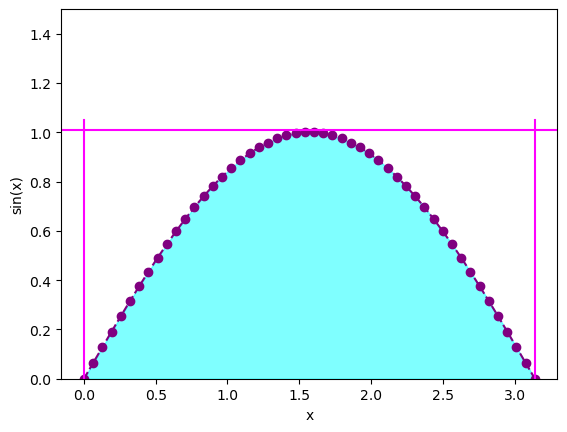

In [421]:
#first visualise the problem

x=np.linspace(0,np.pi)
plt.plot(x, np.sin(x), color="purple", linestyle="--", marker="o", alpha=1.0)
plt.fill_between(x,np.sin(x),color='cyan', alpha=0.5)
plt.xlabel(r"x")
plt.ylabel(r"sin(x)")
plt.ylim(0,1.5)
plt.axhline(y=1.01, xmin=0, xmax=3.14, color="magenta")
plt.axvline(x=0, ymin=0, ymax=0.7,color="magenta")
plt.axvline(x=3.14, ymin=0, ymax=0.7,color="magenta")



To find out the area under the curve, we can generates large number of random points using Monte Carlo Method in the boxed regoin and we will check how many of them lies inside the shaded region which will evnetually give you the required result.

In [422]:
#same prescription as defined above

def function(x):
    y=np.sin(x)
    return y

count=0.0 #how many points generated, intially zero
in_area=0.0 #points that falls inside the curve initially is zero

while count <= 500000: 
    ''' this generates x and y coordinates'''
    x=random.uniform(0,np.pi) #domain of x
    y=random.uniform(0,2) #range of y
    
    if y < function(x):
        in_area+=1
        '''this ensures counts lies inside the curve'''
    count+=1 #repeating the process until 100000 points
    
height=2
width=np.pi # upperb bound-lower bound of x
area_of_box=height*width
result=(in_area/count)*area_of_box
print("Integrated values",result )

Integrated values 1.9928715972467979


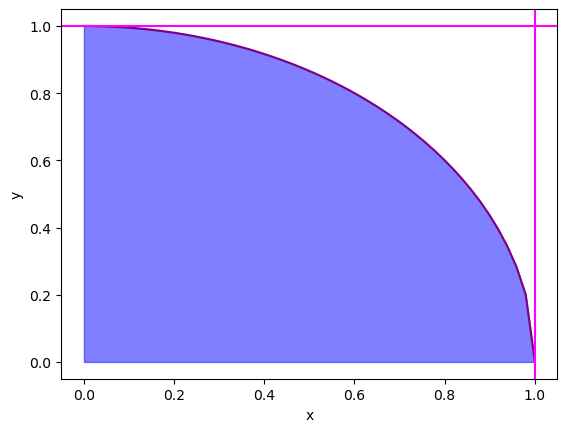

In [423]:
# Another example let's calculate the values of pi using Monte Carlo Method.

#first visualise the problem

x=np.linspace(0,1)
plt.plot(x,np.sqrt(1-x**2),color="purple")
plt.xlabel(r"x")
plt.ylabel("y")
plt.fill_between(x,np.sqrt(1-x**2),color='blue', alpha=0.5)
plt.axhline(y=1, xmin=0,xmax=1.0, color="magenta", alpha=1)
plt.axvline(x=1, ymin=0,ymax=1.0, color="magenta", alpha=1)

To find out the area under the curve, we can generates large number of random points using Monte Carlo Method in the boxed regoin and check how many of them lies inside the shaded region of quarter cirlce. We need to multiply by 4 which will evnetually give you the required result for full circle.

Area of square = $r^2$ , Area of Circle = $\pi\, r^2$, The above shaded region is quarter circle with area 1/4 of circle.

Probability that points lies inside the curve = $\frac{Area\,of\, quarter\, circle}{Area\,of \,box}=\frac{\pi\,r^2}{4\,r^2}$

$\Longrightarrow$ Points lies inside the curve / total generated points = $\frac{Area\,of\, quarter\, circle}{Area\,of \,box}=\frac{\pi}{4}$

$\Longrightarrow$ Area of quarter circle $=\frac{\pi}{4} = $
(Points lies inside the curve / total generated points)$*$(Area of box)

$\Longrightarrow$ Area of circle $=\pi=4*$
(Points lies inside the curve / total generated points)$*$(Area of box)

In [424]:
#Estimate values of pi using Monte Carlo Method.

def function(x):
    y=np.sqrt(1-x**2)
    return y

points=0.0 #how many points generated, intially zero
in_area=0.0 #points that falls inside the curve initially is zero

while points <= 100000: 
    ''' this generates x and y coordinates'''
    x=random.uniform(0,1) #domain of x
    y=random.uniform(1,0) #range of y
    
    if y < function(x):
        in_area+=1
        '''this ensures counts lies inside the curve'''
    points+=1 #repeating the process until 100000 points
    
height=1 #height of the square
width=1 #width of the square
area_of_box=(height*width) 
result=4*(in_area/points)*area_of_box # 4 multiplied because we can think of four boxes inside a square 
print("Integrated values of pi using Monte Carlo Method is =", result )

Integrated values of pi using Monte Carlo Method is = 3.1456085439145607


# Monte Carlo Simulation: Physics  Problem

We want to simulate the decay rate of radioactive substance N with respect to time t. Let's say $N_0$ is the initial number of radioactive substance when time $t=t_0$. At later time t what would be the number of radioactive substance left that we want to simulate using Monte Carlo Method. 

Radioactive Decay rate is given by,

$$\frac{dN}{dt}=-\lambda N\tag{2}$$  

The negative sign indicates the subtance decays and hence it decreases in time. We know the analytical solution of eq.2 which is $N=N_0 e^{-\lambda t}$ however one can verify the result using sympy module.

In [425]:
smp.init_printing()  # prints pretty output


Lambda, N_0,N,t=smp.symbols("Lambda N_0 N t")

#Creating a depending variable

N=smp.Function("N")

#Taking derivative of the function

N(t).diff(t) 

#Creating a differntial equation

diff_eqn=smp.Eq(N(t).diff(t),-Lambda*N(t))

#solving with initial condition

ics={N(0):N_0}

sol=smp.dsolve(diff_eqn,ics=ics) #analytical solution of N

print("Analytical solution is =", sol)

Analytical solution is = Eq(N(t), N_0*exp(-Lambda*t))


Rewriting the eq.2 we get,

\begin{align*}
\frac{dN}{N}&=-\lambda dt\\
\frac{\Delta N}{N}&=-\lambda \Delta t \\ 
for\, \Delta t=1, we \,get,\\
\frac{\Delta N}{N}&=-\lambda\\
|\frac{\Delta N}{N}&|=\lambda
\end{align*}

The $\lambda$ is called the disintegration constant $\approx$ decay probability. We can relate $\lambda$ with half life of the radioactive substance in the following way;

\begin{align*}
N&=N_0e^{-\lambda t}\\\\
\frac{N_0/2}{N_0}&=e^{-\lambda t_{1/2}}\\ \\
\frac{1}{2}&=e^{-\lambda t_{1/2}}\\\\
ln \,2&=\lambda t_{1/2}\\\\
t_{1/2}&=\frac{ln\,2}{\lambda}\\\\
\end{align*}

The $\lambda$ is decay probability and 1-$\lambda$ is survival probability  of a radioactive decay substance or any kind of radioactive nucleus.

In [426]:
t_half=100                                #half life time in arbitrary unit
Lambda=np.log(2)/t_half
p=Lambda                                  # decay prob, dt=1
q=1-p                                     # survival prob
N=10000                                   #no of atoms initially (N_0)
t=100                                    #time period over which radioactive decay  goes on     

In [427]:
def decay(N):
    population=[]
    for time in range(t):               
        r=np.random.random(N)
        survive=np.sum(r < q)            #No. of atoms. survived
        population.append(survive)
        N=survive                      #update for the next step
    return np.array(population) #no of atoms survived in each consequitive decay

The decay of radioactive substance is a statistical process however we can repeat the above process for mutliple times and average over all the processes  would give you the mean decay.



In [428]:
mean_decay=np.mean([decay(N) for i in range(1000)], axis=0)
std_decay=np.std([decay(N) for i in range(1000)], axis=0)

Text(0, 0.5, 'N')

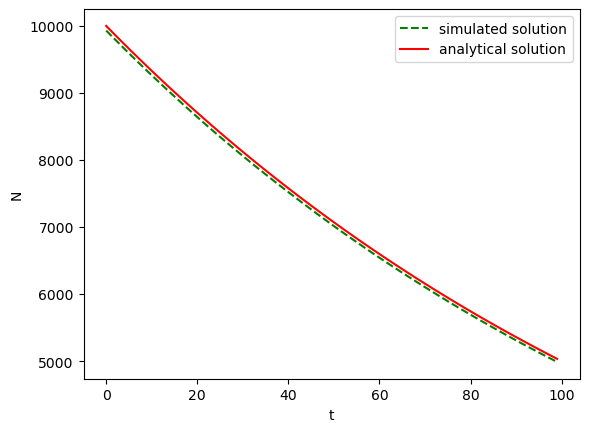

In [429]:
#plt.plot(np.arange(t),decay(N),label="simulated solution")  #simulated result for single process
plt.plot(np.arange(t),mean_decay,"g--",label="simulated solution")  #simulated result for same 1000 processes
plt.plot(np.arange(t),N*np.exp(-Lambda*np.arange(t)),"r-", label="analytical solution")  #exact result
plt.legend()
plt.xlabel("t")
plt.ylabel("N")

We can see in the above fig that the analytical and simulated result of radioactive decay quite matches with each other.